<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_4'

In [4]:
os.listdir(base_path)

['data_multi_delta_4_n250.csv',
 'data_multi_delta_4_n120.csv',
 'data_multi_delta_4_n60.csv',
 'data_multi_delta_4_n30.csv',
 'data_multi_delta_4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.951277,61.345146,44.779797,-1140.030803,-971.954583,-1869.073559,897.118976
1,0.0,1.0,21.296676,59.488267,60.286167,-708.902444,-557.831335,-472.150298,-85.681037
2,0.0,2.0,59.885591,24.054843,88.632215,493.283035,675.855684,2669.031169,-1993.175485
3,0.0,3.0,91.680597,43.838989,65.833916,2781.933376,2993.286878,-320.174465,3313.461343
4,0.0,4.0,33.556811,58.897720,71.466455,-2402.532592,-2228.611605,-92.542797,-2136.068809
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,63.172242,40.284871,38.065828,-2340.261605,-2188.738664,599.150082,-2787.888745
29996,999.0,26.0,78.235839,31.214907,33.446303,972.733123,1125.630172,1060.249615,65.380557
29997,999.0,27.0,41.304189,38.383234,87.403651,1848.931373,2026.022446,946.743981,1079.278465
29998,999.0,28.0,82.955105,57.461649,41.265048,2722.675272,2914.357074,461.373951,2452.983123


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.951277,61.345146,44.779797,-1140.030803,-971.954583,-1869.073559,897.118976
1,0.0,1.0,21.296676,59.488267,60.286167,-708.902444,-557.831335,-472.150298,-85.681037
2,0.0,2.0,59.885591,24.054843,88.632215,493.283035,675.855684,2669.031169,-1993.175485
3,0.0,3.0,91.680597,43.838989,65.833916,2781.933376,2993.286878,-320.174465,3313.461343
4,0.0,4.0,33.556811,58.897720,71.466455,-2402.532592,-2228.611605,-92.542797,-2136.068809
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,63.172242,40.284871,38.065828,-2340.261605,-2188.738664,599.150082,-2787.888745
29996,999.0,26.0,78.235839,31.214907,33.446303,972.733123,1125.630172,1060.249615,65.380557
29997,999.0,27.0,41.304189,38.383234,87.403651,1848.931373,2026.022446,946.743981,1079.278465
29998,999.0,28.0,82.955105,57.461649,41.265048,2722.675272,2914.357074,461.373951,2452.983123


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    51.951277  61.345146  ... -1869.073559   897.118976
      1.0    21.296676  59.488267  ...  -472.150298   -85.681037
      2.0    59.885591  24.054843  ...  2669.031169 -1993.175485
      3.0    91.680597  43.838989  ...  -320.174465  3313.461343
      4.0    33.556811  58.897720  ...   -92.542797 -2136.068809
...                ...        ...  ...          ...          ...
999.0 25.0   63.172242  40.284871  ...   599.150082 -2787.888745
      26.0   78.235839  31.214907  ...  1060.249615    65.380557
      27.0   41.304189  38.383234  ...   946.743981  1079.278465
      28.0   82.955105  57.461649  ...   461.373951  2452.983123
      29.0   51.483516  84.192348  ...  -530.504057  1204.431618

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    51.951277  61.345146  ... -1869.073559   897.118976
      1.0    21.296676  59.488267  ...  -472.150298   -85.681037
      2.0    59.885591  24.054843  ...  2669.031169 -1993.175485
      3.0    91.680597  43.838989  ...  -320.174465  3313.461343
      4.0    33.556811  58.897720  ...   -92.542797 -2136.068809
...                ...        ...  ...          ...          ...
999.0 25.0   63.172242  40.284871  ...   599.150082 -2787.888745
      26.0   78.235839  31.214907  ...  1060.249615    65.380557
      27.0   41.304189  38.383234  ...   946.743981  1079.278465
      28.0   82.955105  57.461649  ...   461.373951  2452.983123
      29.0   51.483516  84.192348  ...  -530.504057  1204.431618

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.951277,61.345146,44.779797,-1140.030803,-971.954583,-1869.073559,897.118976
1,0.0,1.0,21.296676,59.488267,60.286167,-708.902444,-557.831335,-472.150298,-85.681037
2,0.0,2.0,59.885591,24.054843,88.632215,493.283035,675.855684,2669.031169,-1993.175485
3,0.0,3.0,91.680597,43.838989,65.833916,2781.933376,2993.286878,-320.174465,3313.461343
4,0.0,4.0,33.556811,58.897720,71.466455,-2402.532592,-2228.611605,-92.542797,-2136.068809
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,63.172242,40.284871,38.065828,-2340.261605,-2188.738664,599.150082,-2787.888745
29996,999.0,26.0,78.235839,31.214907,33.446303,972.733123,1125.630172,1060.249615,65.380557
29997,999.0,27.0,41.304189,38.383234,87.403651,1848.931373,2026.022446,946.743981,1079.278465
29998,999.0,28.0,82.955105,57.461649,41.265048,2722.675272,2914.357074,461.373951,2452.983123


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    51.951277  61.345146  ... -1869.073559   897.118976
      1.0    21.296676  59.488267  ...  -472.150298   -85.681037
      2.0    59.885591  24.054843  ...  2669.031169 -1993.175485
      3.0    91.680597  43.838989  ...  -320.174465  3313.461343
      4.0    33.556811  58.897720  ...   -92.542797 -2136.068809
...                ...        ...  ...          ...          ...
999.0 25.0   63.172242  40.284871  ...   599.150082 -2787.888745
      26.0   78.235839  31.214907  ...  1060.249615    65.380557
      27.0   41.304189  38.383234  ...   946.743981  1079.278465
      28.0   82.955105  57.461649  ...   461.373951  2452.983123
      29.0   51.483516  84.192348  ...  -530.504057  1204.431618

[30000 rows x 7 columns]

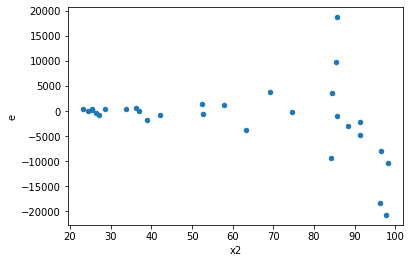

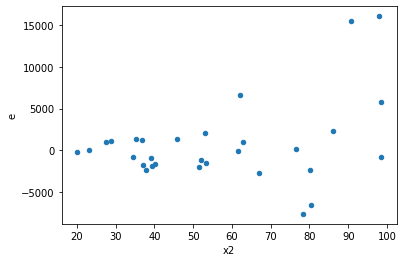

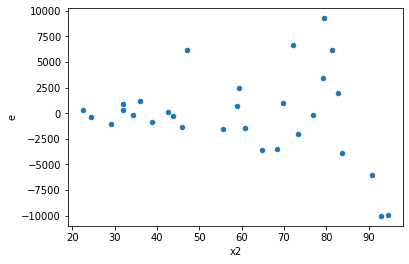

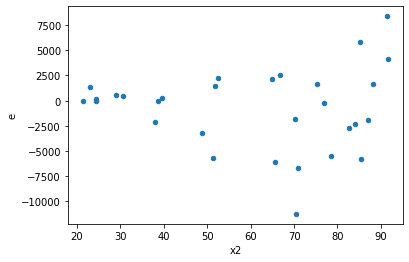

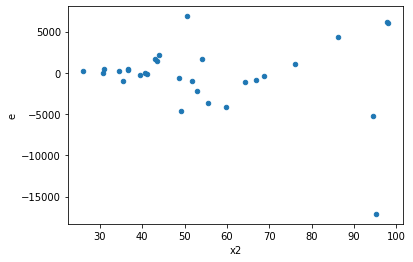

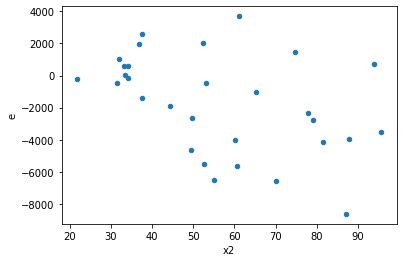

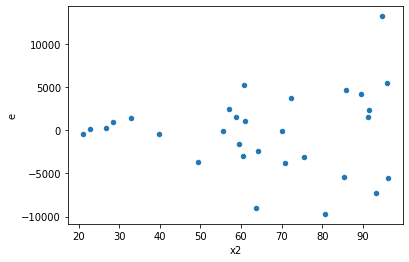

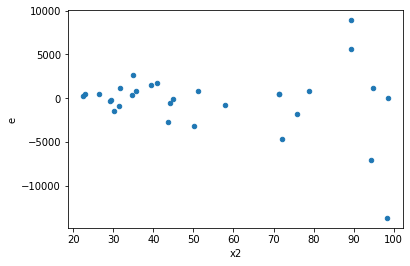

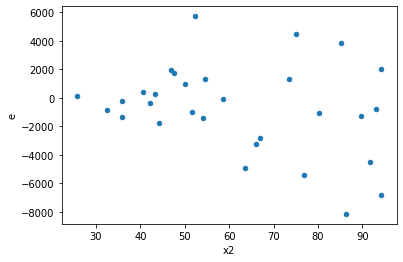

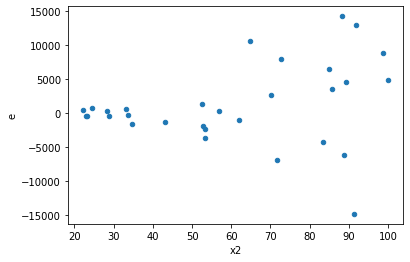

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,9.0,9.0,20702576.97372658,495921495.23761374,2300286.3304140647,55102388.35973486,23.95457801543172,6.0852167068858876e-05,0.9999695739164656,3.0426083534429438e-05,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,41414216.95251563,232870721.2377793,4601579.661390626,25874524.581975475,5.622965695688083,0.016911739227273737,0.9915441303863631,0.008455869613636868,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,160700304.5606941,294632224.1435801,17855589.395632677,32736913.79373112,1.833426669283641,0.37995533064312226,0.8100223346784389,0.18997766532156113,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,4969976.82707753,883602156.0898004,552219.647453059,98178017.34331115,177.78798308992927,9.54017576049182e-09,0.9999999952299121,4.77008788024591e-09,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,21806306.198872924,328326319.0039495,2422922.9109858805,36480702.11154994,15.05648485395107,0.00041429729992303876,0.9997928513500385,0.00020714864996151938,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,180000467.9879114,300695389.93764013,20000051.998656824,33410598.881960016,1.670525600843629,0.45643264743300116,0.7717836762834994,0.22821632371650058,Reject005=1 : Homoscedasticity
9.0,9.0,9.0,64965832.060966626,250055668.0103566,7218425.784551848,27783963.112261847,3.849033562376204,0.057335276019148784,0.9713323619904256,0.028667638009574392,Reject005=1 : Homoscedasticity
11.0,9.0,9.0,43296262.735427625,295520246.651794,4810695.859491958,32835582.961310446,6.82553707828416,0.008595501660371152,0.9957022491698144,0.004297750830185576,Reject005=0 : Heteroscedasticity
16.0,9.0,9.0,134963218.00735396,300870076.65814674,14995913.111928217,33430008.51757186,2.2292746208952483,0.2481078950817317,0.8759460524591342,0.12405394754086585,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,562913396.4286848,26957578.53663645,62545932.93652054,2995286.5040707164,0.04788938886099451,0.0001081132812758851,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,63636319.4679702,42953800.27150649,7070702.1631078,4772644.474611832,0.6749887584734727,0.5675303209184339,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,20702576.97372658,495921495.23761374,2300286.3304140647,55102388.35973486,23.95457801543172,6.0852167068858876e-05,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,41414216.95251563,232870721.2377793,4601579.661390626,25874524.581975475,5.622965695688083,0.016911739227273737,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,160700304.5606941,294632224.1435801,17855589.395632677,32736913.79373112,1.833426669283641,0.37995533064312226,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,4969976.82707753,883602156.0898004,552219.647453059,98178017.34331115,177.78798308992927,9.54017576049182e-09,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,21806306.198872924,328326319.0039495,2422922.9109858805,36480702.11154994,15.05648485395107,0.00041429729992303876,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,180000467.9879114,300695389.93764013,20000051.998656824,33410598.881960016,1.670525600843629,0.45643264743300116,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,201381664.51884094,32681662.984503552,22375740.502093438,3631295.887167061,0.16228718271144246,0.01233436778930234,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    545
Reject005=1 : Homoscedasticity      455
Name: Result_test, dtype: int64